In [2]:
#pip install ennemi

In [3]:
#pip install causal-ccm

In [4]:
#from causal_ccm.causal_ccm import ccm
import pandas as pd
import matplotlib.pyplot as plt
#from tqdm import tqdm # for showing progress bar in for loops
import numpy as np

In [5]:
# import data
datapath_for_ccm = 'C:/Users/klbal/Desktop/Internship #2/my_data/pivoted_output.txt'

ccm_data = pd.read_csv(datapath_for_ccm, delimiter='\t')

print(ccm_data)

     Chlamy107  Chlamy123  Chlamy125  Chlamy165  Chlamy19  Chlamy23  Chlamy24  \
0     0.479167    0.00000   4.541667   0.125000  0.166667  0.140625  0.166667   
1     0.312500    0.12500  19.770833   0.812500  0.041667  0.000000  0.875000   
2     0.208333    0.06250  19.500000   0.875000  0.041667  0.000000  0.833333   
3     0.250000    0.12500  19.270833   0.583333  0.000000  0.000000  0.708333   
4     0.333333    0.21875  17.645833   0.312500  0.041667  0.000000  0.416667   
..         ...        ...        ...        ...       ...       ...       ...   
105   0.000000    0.06250   2.562500   0.354167  0.000000  0.000000  0.000000   
106   0.000000    0.03125   2.375000   0.437500  0.000000  0.000000  0.000000   
107   0.000000    0.03125   2.708333   0.479167  0.000000  0.015625  0.000000   
108   0.000000    0.06250   1.979167   0.187500  0.000000  0.000000  0.000000   
109   0.000000    0.03125   2.541667   0.333333  0.000000  0.000000  0.041667   

     Chlamy26  Chlamy28  Ch

In [6]:
# define species to compare

X_series = ccm_data['Chlamy26']

Y_series = ccm_data['Chlamy88']

print(X_series)
print(Y_series)

0      0.2625
1      0.2250
2      0.2250
3      0.1375
4      0.1250
        ...  
105    0.0000
106    0.0000
107    0.0000
108    0.0000
109    0.0000
Name: Chlamy26, Length: 110, dtype: float64
0      1.075
1      0.825
2      0.675
3      0.725
4      0.775
       ...  
105    0.050
106    0.025
107    0.000
108    0.000
109    0.025
Name: Chlamy88, Length: 110, dtype: float64


In [7]:
# perform ccm

from causal_ccm.causal_ccm import ccm
tau = 1
E = 2
L = len(X_series)

ccm1 = ccm(X_series, Y_series, tau, E, L)

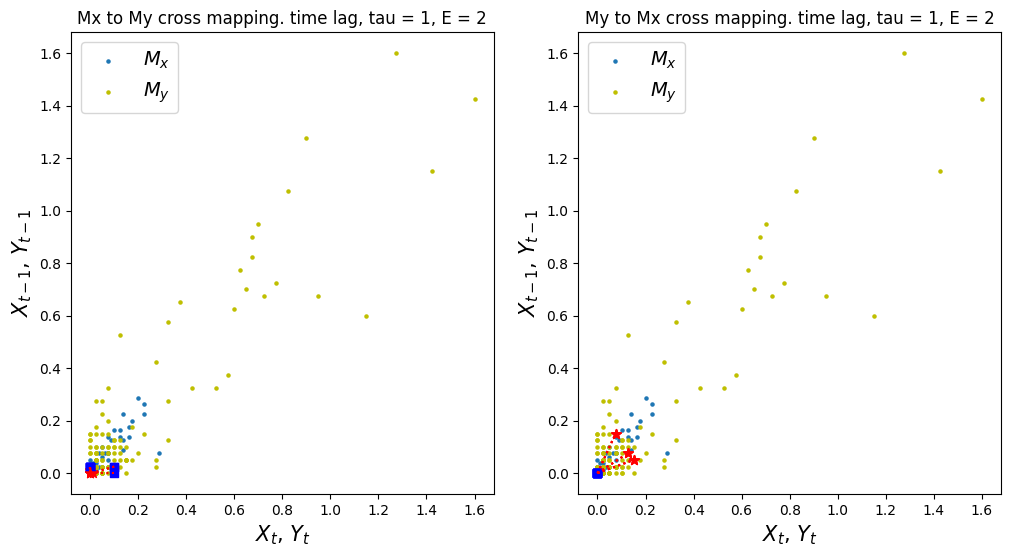

In [8]:
ccm1.visualize_cross_mapping()

In [9]:
# causality X -> Y
# returns: (correlation ("strength" of causality), p-value(significance))


#corr_, p = ccm1.causality()
#corr_, p

In [10]:
# visualize correlation of X->Y
# stronger correlation = stronger causal relationship


#ccm1.plot_ccm_correls()

X->Y r 0.91 p value 0.0
Y->X r 0.85 p value 0.0


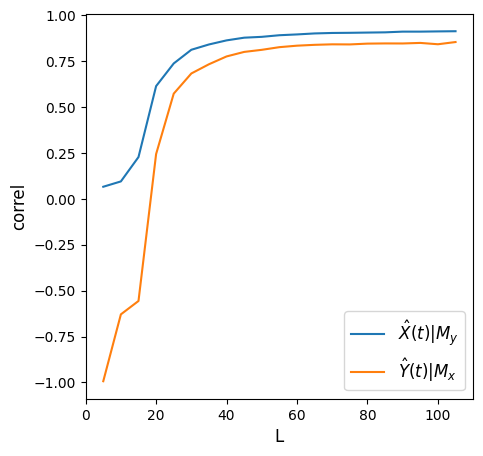

In [11]:
# checking convergence

L_range = range(5, len(X_series), 5) # L values to test
tau = 1
E = 2

Xhat_My, Yhat_Mx = [], [] # correlation list
for L in L_range: 
    ccm_XY = ccm(X_series, Y_series, tau, E, L) # define new ccm object # Testing for X -> Y
    ccm_YX = ccm(Y_series, X_series, tau, E, L) # define new ccm object # Testing for Y -> X    
    Xhat_My.append(ccm_XY.causality()[0]) 
    Yhat_Mx.append(ccm_YX.causality()[0]) 
    
print('X->Y r', np.round(Xhat_My[-1], 2), 'p value', np.round(ccm_XY.causality()[1], 4))
print('Y->X r', np.round(Yhat_Mx[-1], 2), 'p value', np.round(ccm_YX.causality()[1], 4))    
    
# plot convergence. Convergence is necessary to conclude causality
plt.figure(figsize=(5,5))
plt.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$')
plt.plot(L_range, Yhat_Mx, label='$\hat{Y}(t)|M_x$')
plt.xlabel('L', size=12)
plt.ylabel('correl', size=12)
plt.legend(prop={'size': 12})  

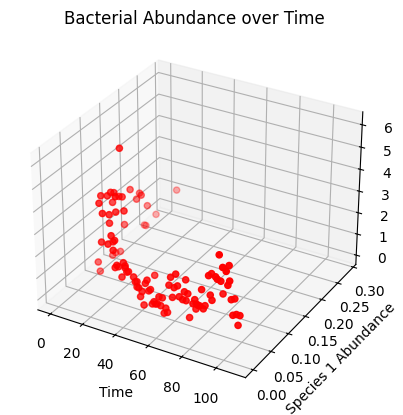

In [12]:
# 3D plot ???

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = {
    'Time': list(range(0, len(ccm_data['Chlamy26']), 1)),  
    'Species1_Abundance': ccm_data['Chlamy26'].values,
    'Species2_Abundance': ccm_data['Chlamy6'].values
    
}


df = pd.DataFrame(data)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extracting data
x = df['Time']
y = df['Species1_Abundance']
z = df['Species2_Abundance']

# Plot
ax.scatter(x, y, z, c='r', marker='o')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Species 1 Abundance')
ax.set_zlabel('Species 2 Abundance')
ax.set_title('Bacterial Abundance over Time')

# Show plot
plt.show()


In [13]:
# shadow manifold functiom

'''
time_series -> Data measured over time (abundance data)
L           -> Length of time series that should be concidered
E           -> Embedding dimension
tau         -> time delay

'''

def shadow_manifold(time_series, L, E, tau):

    # crop data at L
    crp_ts = time_series[:L]

    shadow_M = {}

    for t in range((E - 1) * tau, L): # iterate through time

        lag = [] # lagged values

        for t2 in range(0, E): # get lags - add 1 to E-1 to include E

            lag.append(time_series[t - t2 * tau]) # access lagged time points and store in list

        shadow_M[t] = lag # add list to dict
    
    return shadow_M

In [17]:
# Parameters
L = 100  # Length of time series
E = 3    # Embedding dimension
tau = 2  # Time delay


shadow_M = shadow_manifold(X_series, L, E, tau)

shadow_manifold(X_series, L, E, tau)

{4: [0.125, 0.225, 0.2625],
 5: [0.0875, 0.1375, 0.225],
 6: [0.1375, 0.125, 0.225],
 7: [0.075, 0.0875, 0.1375],
 8: [0.2875, 0.1375, 0.125],
 9: [0.2, 0.075, 0.0875],
 10: [0.175, 0.2875, 0.1375],
 11: [0.1624999999999999, 0.2, 0.075],
 12: [0.125, 0.175, 0.2875],
 13: [0.1375, 0.1624999999999999, 0.2],
 14: [0.1625, 0.125, 0.175],
 15: [0.1, 0.1375, 0.1624999999999999],
 16: [0.05, 0.1625, 0.125],
 17: [0.075, 0.1, 0.1375],
 18: [0.075, 0.05, 0.1625],
 19: [0.0625, 0.075, 0.1],
 20: [0.05, 0.075, 0.05],
 21: [0.025, 0.0625, 0.075],
 22: [0.075, 0.05, 0.075],
 23: [0.075, 0.025, 0.0625],
 24: [0.0375, 0.075, 0.05],
 25: [0.0125, 0.075, 0.025],
 26: [0.0125, 0.0375, 0.075],
 27: [0.025, 0.0125, 0.075],
 28: [0.0375, 0.0125, 0.0375],
 29: [0.025, 0.025, 0.0125],
 30: [0.05, 0.0375, 0.0125],
 31: [0.025, 0.025, 0.025],
 32: [0.0, 0.05, 0.0375],
 33: [0.0125, 0.025, 0.025],
 34: [0.0, 0.0, 0.05],
 35: [0.0, 0.0125, 0.025],
 36: [0.0, 0.0, 0.0],
 37: [0.0, 0.0, 0.0125],
 38: [0.0, 0.0, 0.

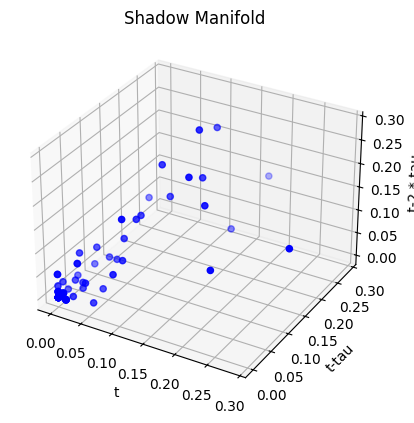

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# Daten aus dem Dictionary extrahieren
x = []
y = []
z = []

for key in shadow_M:
    x.append(shadow_M[key][0])
    y.append(shadow_M[key][1])
    z.append(shadow_M[key][2])

# Plot vorbereiten
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Punkte plotten
ax.scatter(x, y, z, c='b', marker='o')

# Achsenbeschriftung
ax.set_xlabel('t')
ax.set_ylabel('t-tau')
ax.set_zlabel('t-2 * tau')

# Titel
plt.title('Shadow Manifold')

# Anzeigen
plt.show()